In [2]:
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline

# from rpy2.robjects.packages import importr
# igraph = importr('igraph')
# import pandas as pd
# from rpy2.robjects import r, pandas2ri
# a = pandas2ri.py2ri(nx.to_pandas_adjacency(nxG))

import os
import numpy as np
import rpy2.robjects as robjects

In [3]:
def community(nxG, algorithm, fig_name = "G"):
    """
    In:
        nxG: grafo de networkx.
        algorithm: string, entre las siguientes opciones: 
            fast_greedy
            edge_betweenness
            louvain
            infomap
        fig_name: nombre de la figura que se genera al clsuterizar. Le agrega automaticamente el nombre del algoritmo usado y el nombre del grafo si lo tuviere
    Out:
        labels: numpy array con la pertenencia de cada nodo al cluster.
    
    """
    gml_file_name = "G.gml"
    fig_name += "_"+nxG.name+"_"+algorithm+".svg"
    nx.write_gml(nxG, gml_file_name)
    
    igG = robjects.r('''
        f <- function(file, algorithm, fig_name){
            require("igraph")     
            
            G <- read_graph(file, "gml")
            #format = c("edgelist", "pajek", "ncol", "lgl", "graphml","dimacs", "graphdb", "gml", "dl"), ...)
            
            if(algorithm == "fast_greedy"){
                c <- cluster_fast_greedy(G, 
                    merges = TRUE, 
                    modularity = TRUE, 
                    membership = TRUE)
            }
            
            if(algorithm == "edge_betweenness"){
                c <- cluster_edge_betweenness(G,directed = FALSE,edge.betweenness = TRUE)
            }
            
            if(algorithm == "louvain"){
                c <- cluster_louvain(G)
            }
            
            if(algorithm == "infomap"){
                c <- cluster_infomap(G)
            }
            
            svg(fig_name)
            plot(c, G)
            dev.off()
            
            return(membership(c))
        }
    ''')
    
    labels = igG(gml_file_name, algorithm, fig_name)
    os.remove(gml_file_name)
    return np.array(labels)

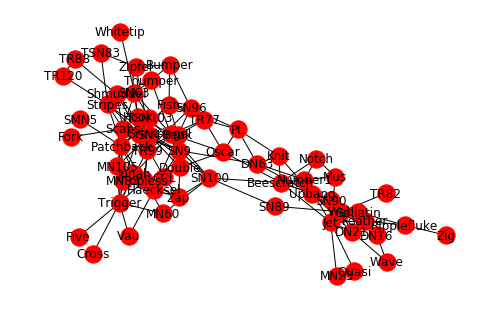

In [5]:
import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import pandas as pd

G = nx.read_gml('D:\Para procesar\Académica\Ciencias Físicas\Doctorado\Materias\Redes complejas\Trabajos_prácticos\Redes_FLEM\TP_3\dolphins.gml')

nx.draw(G,with_labels=True)
plt.show()

In [6]:
GG=G.copy()
labels_infomap = community(GG, "infomap")
GG=G.copy()
labels_fastGreedy = community(GG, "fast_greedy")
GG=G.copy()
labels_edgeBetweenness = community(GG, "edge_betweenness")
GG=G.copy()
labels_louvain = community(GG, "louvain")

## Infomap

In [8]:
labels_infomap

array([5., 4., 5., 6., 3., 2., 2., 4., 6., 2., 5., 3., 1., 2., 1., 3., 1.,
       2., 3., 4., 1., 3., 2., 3., 3., 4., 4., 4., 4., 3., 4., 2., 2., 1.,
       1., 3., 6., 1., 1., 6., 1., 2., 5., 1., 1., 3., 1., 5., 2., 1., 1.,
       3., 1., 1., 2., 3., 2., 2., 1., 6., 2., 1.])

None


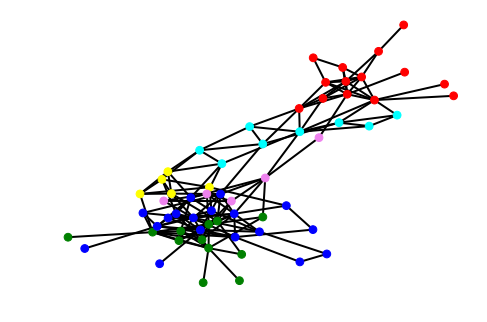

Spring


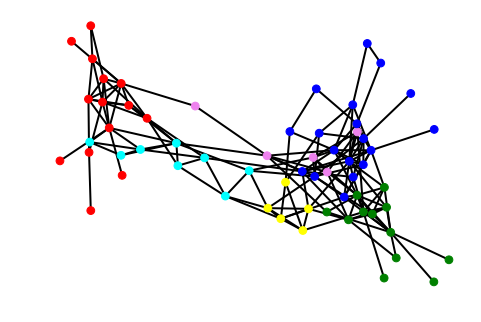

Kamada kawai


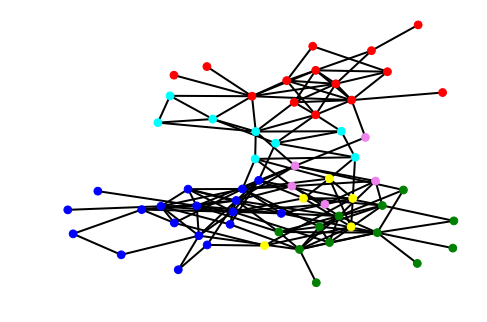

In [10]:
G_im=G.copy()
color_map = []

attributes_im = []
color_map = []
for nom in G_im.nodes():
    attributes_im.append([nom])
    
    
for node in labels_infomap:
    if node == 1.:
        color_map.append('blue')
    elif node ==2.:
        color_map.append('red')
    elif node == 3.:
        color_map.append('green')
    elif node == 4.:
        color_map.append('cyan')
    elif node == 5.:
        color_map.append('yellow')    
    else:
        color_map.append('violet')
          
for i in range(len(attributes_im)):
    G_im.nodes[attributes_im[i][0]]['Cluster'] = labels_infomap[i]

options = {
'node_size': 60,
'width': 2,
}

print("None")
nx.draw(G_im,node_color = color_map, **options)
plt.show()

print("Spring")
nx.draw_spring(G_im,node_color = color_map, **options)
plt.show()

print("Kamada kawai")
nx.draw_kamada_kawai(G_im,node_color = color_map, **options)
plt.show()

## Fast Greedy

In [11]:
labels_fastGreedy

array([2., 1., 2., 3., 3., 1., 1., 1., 3., 1., 2., 3., 2., 1., 2., 3., 2.,
       1., 3., 1., 2., 3., 1., 3., 3., 1., 1., 1., 1., 3., 1., 1., 1., 2.,
       2., 3., 4., 2., 2., 4., 2., 1., 2., 2., 2., 3., 2., 2., 1., 2., 2.,
       3., 2., 2., 1., 3., 1., 1., 2., 3., 1., 2.])

None


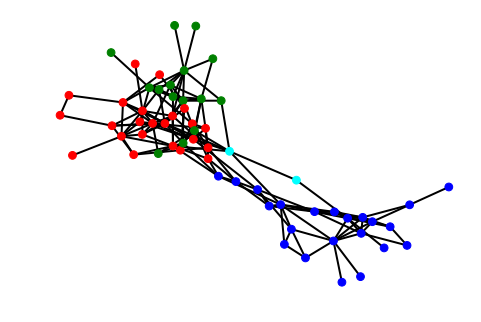

Spring


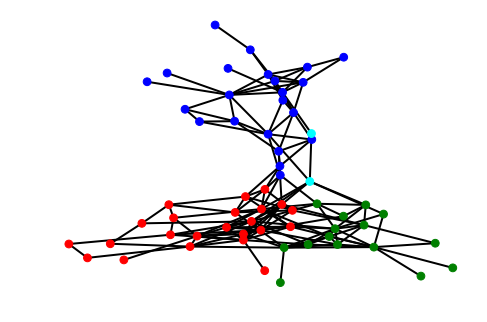

Kamada kawai


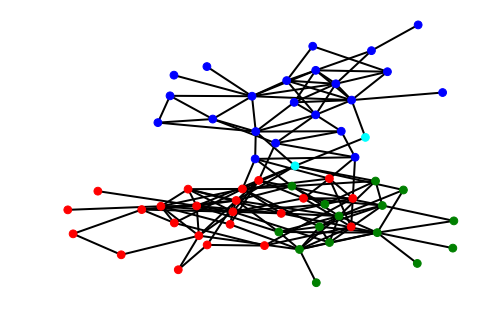

In [13]:
G_fg=G.copy()
color_map = []

attributes_fg = []
color_map = []
for nom in G_fg.nodes():
    attributes_fg.append([nom])
    
    
for node in labels_fastGreedy:
    if node == 1.:
        color_map.append('blue')
    elif node ==2.:
        color_map.append('red')
    elif node == 3.:
        color_map.append('green')
    elif node == 4.:
        color_map.append('cyan')
    else:
        color_map.append('yellow')
          

for i in range(len(attributes_fg)):
    G_fg.nodes[attributes_fg[i][0]]['Cluster'] = labels_fastGreedy[i]

options = {
'node_size': 60,
'width': 2,
}

print("None")
nx.draw(G_fg,node_color = color_map, **options)
plt.show()

print("Spring")
nx.draw_spring(G_fg,node_color = color_map, **options)
plt.show()

print("Kamada kawai")
nx.draw_kamada_kawai(G_fg,node_color = color_map, **options)
plt.show()

## Louvain

In [14]:
labels_louvain

array([1., 2., 1., 5., 5., 4., 4., 2., 5., 4., 1., 5., 3., 4., 3., 5., 3.,
       4., 5., 2., 3., 5., 4., 5., 5., 2., 2., 2., 2., 5., 2., 4., 4., 3.,
       3., 5., 3., 3., 3., 3., 3., 4., 1., 3., 3., 5., 3., 1., 4., 3., 3.,
       5., 3., 1., 4., 5., 4., 4., 3., 5., 4., 1.])

None


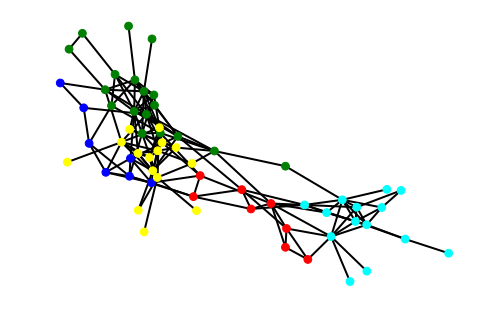

Spring


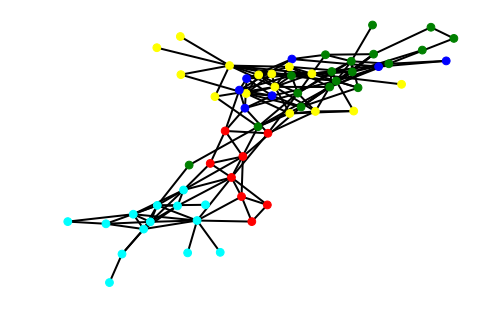

Kamada kawai


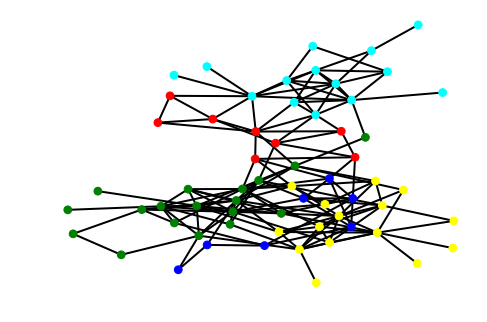

In [15]:
G_li=G.copy()
color_map = []

attributes_li = []
color_map = []
for nom in G_li.nodes():
    attributes_li.append([nom])
    
for node in labels_louvain:
    if node == 1.:
        color_map.append('blue')
    elif node ==2.:
        color_map.append('red')
    elif node == 3.:
        color_map.append('green')
    elif node == 4.:
        color_map.append('cyan')
    elif node == 5.:
        color_map.append('yellow')
    else:
        color_map.append('brown')
          

for i in range(len(attributes_li)):
    G_li.nodes[attributes_li[i][0]]['Cluster'] = labels_louvain[i]

options = {
'node_size': 60,
'width': 2,
}

print("None")
nx.draw(G_li,node_color = color_map, **options)
plt.show()

print("Spring")
nx.draw_spring(G_li,node_color = color_map, **options)
plt.show()

print("Kamada kawai")
nx.draw_kamada_kawai(G_li,node_color = color_map, **options)
plt.show()

## Edge Betweenes

In [16]:
labels_edgeBetweenness

array([1., 2., 1., 3., 4., 2., 2., 2., 3., 2., 1., 4., 3., 2., 3., 4., 3.,
       2., 4., 2., 3., 4., 2., 4., 4., 2., 2., 2., 1., 4., 1., 2., 2., 3.,
       3., 4., 3., 3., 3., 2., 3., 2., 1., 3., 3., 4., 3., 1., 2., 3., 3.,
       4., 3., 5., 2., 4., 2., 2., 3., 3., 2., 5.])

None


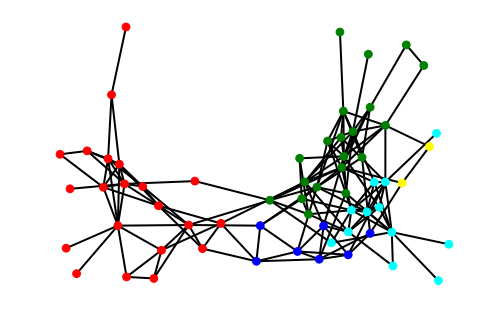

Spring


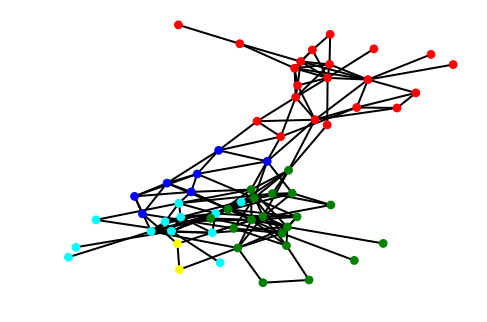

Kamada kawai


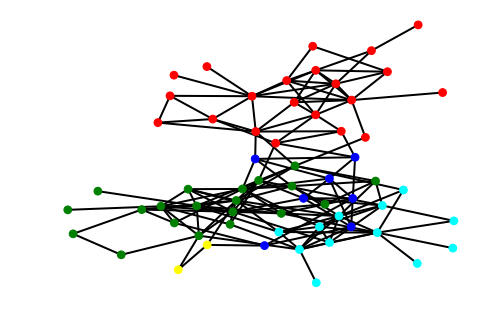

In [17]:
G_eb=G.copy()
color_map = []

attributes_eb = []
color_map = []
for nom in G_eb.nodes():
    attributes_eb.append([nom])
    
for node in labels_edgeBetweenness:
    if node == 1.:
        color_map.append('blue')
    elif node ==2.:
        color_map.append('red')
    elif node == 3.:
        color_map.append('green')
    elif node == 4.:
        color_map.append('cyan')
    elif node == 5.:
        color_map.append('yellow')
    else:
        color_map.append('brown')
          

for i in range(len(attributes_eb)):
    G_eb.nodes[attributes_eb[i][0]]['Cluster'] = labels_edgeBetweenness[i]

options = {
'node_size': 60,
'width': 2,
}

print("None")
nx.draw(G_eb,node_color = color_map, **options)
plt.show()

print("Spring")
nx.draw_spring(G_eb,node_color = color_map, **options)
plt.show()

print("Kamada kawai")
nx.draw_kamada_kawai(G_eb,node_color = color_map, **options)
plt.show()

In [18]:
import time

# def calculate_infomap(np_adj_list, method="infomap"):
#     g = igraph.Graph.Weighted_Adjacency(np_adj_list.tolist(),mode=igraph.ADJ_UPPER)
   
#     t0=time.time()
#     if method=="infomap":
#         labels = g.community_infomap(edge_weights="weight").membership
# #    labels = g.community_label_propagation(weights="weight").membership
#     if method=="fastgreedy":
#         labels = g.community_fastgreedy(edge_weights="weight").membership
   
#     print("Duración: {}s".format(time.time()-t0))
           
#     return labels

from __future__ import division

from functools import wraps
from itertools import product

import networkx as nx
from networkx import NetworkXError
from networkx.utils import not_implemented_for
from networkx.algorithms.community.community_utils import is_partition

__all__ = ['coverage', 'modularity', 'performance']


class NotAPartition(NetworkXError):
    """Raised if a given collection is not a partition.

    """

    def __init__(self, G, collection):
        msg = '{} is not a valid partition of the graph {}'
        msg = msg.format(G, collection)
        super(NotAPartition, self).__init__(msg)


def modularity(G, communities, weight='weight'):
    r"""Returns the modularity of the given partition of the graph.

    Modularity is defined in [1]_ as

    .. math::

        Q = \frac{1}{2m} \sum_{ij} \left( A_{ij} - \frac{k_ik_j}{2m}\right)
            \delta(c_i,c_j)

    where $m$ is the number of edges, $A$ is the adjacency matrix of
    `G`, $k_i$ is the degree of $i$ and $\delta(c_i, c_j)$
    is 1 if $i$ and $j$ are in the same community and 0 otherwise.

    Parameters
    ----------
    G : NetworkX Graph

    communities : list
        List of sets of nodes of `G` representing a partition of the
        nodes.

    Returns
    -------
    Q : float
        The modularity of the paritition.

    Raises
    ------
    NotAPartition
        If `communities` is not a partition of the nodes of `G`.

    Examples
    --------
    >>> G = nx.barbell_graph(3, 0)
    >>> nx.algorithms.community.modularity(G, [{0, 1, 2}, {3, 4, 5}])
    0.35714285714285704

    References
    ----------
    .. [1] M. E. J. Newman *Networks: An Introduction*, page 224.
       Oxford University Press, 2011.

    """
    if not is_partition(G, communities):
        raise NotAPartition(G, communities)

    multigraph = G.is_multigraph()
    directed = G.is_directed()
    m = G.size(weight=weight)
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        norm = 1 / m
    else:
        out_degree = dict(G.degree(weight=weight))
        in_degree = out_degree
        norm = 1 / (2 * m)

    def val(u, v):
        try:
            if multigraph:
                w = sum(d.get(weight, 1) for k, d in G[u][v].items())
            else:
                w = G[u][v].get(weight, 1)
        except KeyError:
            w = 0
        # Double count self-loops if the graph is undirected.
        if u == v and not directed:
            w *= 2
        return w - in_degree[u] * out_degree[v] * norm

    Q = sum(val(u, v) for c in communities for u, v in product(c, repeat=2))
    return Q * norm




# Modularidad

In [19]:
def modularidad(G,labels_louvain,attributes):

    particion = []
    grupo1 = []
    grupo2 = []
    grupo3 = []
    grupo4 = []
    grupo5 = []
    grupo6 = []
    nombres = attributes.copy()

    for i in range(len(labels_louvain)):
        if labels_louvain[i] == 1.:
            grupo1.append(nombres[i][0])
        elif labels_louvain[i] ==2.:
            grupo2.append(nombres[i][0])
        elif labels_louvain[i] == 3.:
            grupo3.append(nombres[i][0])
        elif labels_louvain[i] == 4.:
            grupo4.append(nombres[i][0])
        elif labels_louvain[i] == 5.:
            grupo5.append(nombres[i][0])
        else:
            grupo6.append(nombres[i][0])

    if len(grupo1)>0:
        particion.append(grupo1)
    if len(grupo2)>0:
        particion.append(grupo2)
    if len(grupo3)>0:
        particion.append(grupo3)
    if len(grupo4)>0:
        particion.append(grupo4)
    if len(grupo5)>0:
        particion.append(grupo5)
    if len(grupo6)>0:
        particion.append(grupo6)
    M=modularity(G,particion)
    return M

In [20]:
M_im = modularidad(G_im,labels_infomap,attributes_im)
M_fg = modularidad(G_fg,labels_fastGreedy,attributes_fg)
M_li = modularidad(G_li,labels_louvain,attributes_li)
M_eb = modularidad(G_eb,labels_edgeBetweenness,attributes_eb)

In [21]:
print(M_im)
print(M_fg)
print(M_li)
print(M_eb)

0.5189470353229688
0.4954906847039256
0.5185317036509625
0.5193821446936422


# Silhouette

In [23]:
## Hago la función que calcula las distancias mínimas entre todos los nodos y las devuelve como una matriz
def matriz_distancias(G,attributes):
    N=len(attributes)
    distancias=np.zeros(N**2).reshape(N,N)
    for i in range(N):
        for j in range(N):
            distancias[i,j]=nx.shortest_path_length(G, source=attributes[i][0], target=attributes[j][0], weight=None)
    return(distancias)

#matriz_distancias(GG,attributes)

In [24]:
# Función que calcula silhouette
import seaborn as sns
def silhouette(G,labels,attributes,distancias):
    N=len(attributes)
    N_grupo=int(np.max(labels))
    s=np.zeros(N)
    for i in range(N):
        a=0
        a_cont=0
        for j in range(N):
            if i!=j:
                if labels[i]==labels[j]:
                    a_cont+=1
                    a+=distancias[i,j]
        if a_cont==0:
            a=0
        else:
            a=a/a_cont
        j=np.random.randint(N)
        while labels[j]==labels[i]:
            j=np.random.randint(N)
        b=distancias[i,j]
        s[i]=(b-a)/np.max([a,b])
    return(s)
def takeSecond(elem):
    return elem[1] 
def silhouette_promedio(N,G,labels,attributes):
    distancias=matriz_distancias(G,attributes)
    s=np.zeros(N*len(labels)).reshape(N,len(labels))
    for i in range(N):
        s[i,:]=silhouette(G,labels,attributes,distancias)
    s_list=[]
    for i in range(len(labels)):
        s_list.append([np.mean(s[:,i]),int(labels[i])])
    s_mean=s.mean()
    s_list.sort(reverse=True)
    s_list.sort(key=takeSecond)
    return(s_list,s_mean)

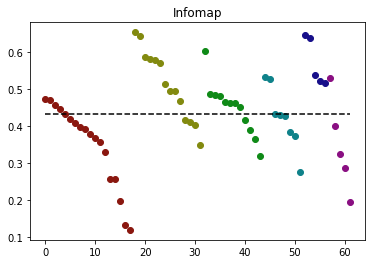

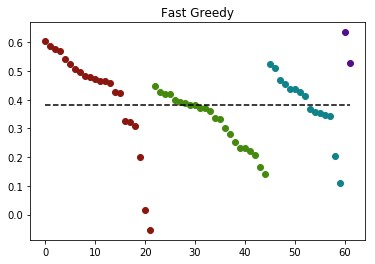

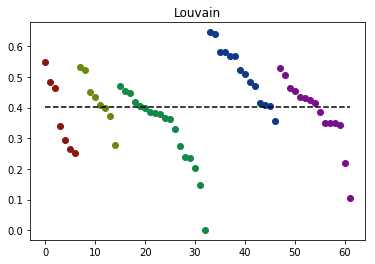

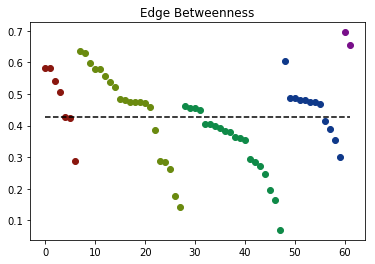

In [26]:
N=1000

s,s_mean_im=silhouette_promedio(N,G_im,labels_infomap,attributes_im)
current_palette = sns.hls_palette(int(np.max(labels_infomap)), l=.3, s=.8)
for i in range(len(s)):
    plt.plot(i,s[i][0],'o',color=current_palette[s[i][1]-1])
plt.plot(range(len(s)),np.ones(len(s))*s_mean_im,'k--')
plt.title('Infomap')
plt.show()

s,s_mean_fg=silhouette_promedio(N,G_fg,labels_fastGreedy,attributes_fg)
current_palette = sns.hls_palette(int(np.max(labels_fastGreedy)), l=.3, s=.8)
for i in range(len(s)):
    plt.plot(i,s[i][0],'o',color=current_palette[s[i][1]-1])
plt.plot(range(len(s)),np.ones(len(s))*s_mean_fg,'k--')
plt.title('Fast Greedy')
plt.show()

s,s_mean_li=silhouette_promedio(N,G_li,labels_louvain,attributes_li)
current_palette = sns.hls_palette(int(np.max(labels_louvain)), l=.3, s=.8)
for i in range(len(s)):
    plt.plot(i,s[i][0],'o',color=current_palette[s[i][1]-1])
plt.plot(range(len(s)),np.ones(len(s))*s_mean_li,'k--')
plt.title('Louvain')
plt.show()

s,s_mean_eb=silhouette_promedio(N,G_eb,labels_edgeBetweenness,attributes_eb)
current_palette = sns.hls_palette(int(np.max(labels_edgeBetweenness)), l=.3, s=.8)
for i in range(len(s)):
    plt.plot(i,s[i][0],'o',color=current_palette[s[i][1]-1])
plt.plot(range(len(s)),np.ones(len(s))*s_mean_eb,'k--')
plt.title('Edge Betweenness')
plt.show()

## Hago una tabla con los resultados de Modularidad y Silhouette

In [27]:
Modularidad=[M_im,M_fg,M_li,M_eb]
S=[s_mean_im,s_mean_fg,s_mean_li,s_mean_eb]

d = {'Modularidad': Modularidad, 'Silhouette': S}
Tabla_1=pd.DataFrame(data=d)
Tabla_1.index=["Infomap","Fast Greedy","Louvain","Edge Betweenes"]
print(Tabla_1)

                Modularidad  Silhouette
Infomap            0.518947    0.433274
Fast Greedy        0.495491    0.380464
Louvain            0.518532    0.401084
Edge Betweenes     0.519382    0.425968


### Para redes aleatorias se esperan valores de modularidad y silhouette = 0, en este caso son todos positivos así que la red es modular 

# Defino función que recablea la red para comparar los valores

In [28]:
import random
def recableado(G):
    GG=G.copy()
    nodos1=[]
    nodos2=[]
    for (i,j) in GG.edges():
        nodos1.append(i)
        nodos2.append(j)
    random.shuffle(nodos2)
    edges=[]
    for i in range(len(nodos1)):
        edges.append((nodos1[i],nodos2[i]))
    G_random=nx.Graph()
    G_random.add_edges_from(edges)
    G_random_gigante=sorted(nx.connected_components(G_random), key=len, reverse=True)[0]
    G_random = G_random.subgraph(G_random_gigante)
    
    GG=G_random.copy()
    labels_infomap_random = community(GG, "infomap")
    attributes_im_random = []
    for nom in GG.nodes():
        attributes_im_random.append([nom])
    M_im_random = modularidad(GG,labels_infomap_random,attributes_im_random)
    s_random,s_mean_im_random=silhouette_promedio(N,GG,labels_infomap_random,attributes_im_random)

    GG=G_random.copy()
    labels_fastGreedy_random = community(GG, "fast_greedy")
    attributes_fg_random = []
    for nom in GG.nodes():
        attributes_fg_random.append([nom])
    M_fg_random = modularidad(GG,labels_fastGreedy_random,attributes_fg_random)
    s_random,s_mean_fg_random=silhouette_promedio(N,GG,labels_fastGreedy_random,attributes_fg_random)

    GG=G_random.copy()
    labels_edgeBetweenness_random = community(GG, "edge_betweenness")
    attributes_eb_random = []
    for nom in GG.nodes():
        attributes_eb_random.append([nom])
    M_eb_random = modularidad(GG,labels_edgeBetweenness_random,attributes_eb_random)
    s_random,s_mean_eb_random=silhouette_promedio(N,GG,labels_edgeBetweenness_random,attributes_eb_random)

    GG=G_random.copy()
    labels_louvain_random = community(GG, "louvain")
    attributes_li_random = []
    for nom in GG.nodes():
        attributes_li_random.append([nom])
    M_li_random = modularidad(GG,labels_louvain_random,attributes_li_random)
    s_random,s_mean_li_random=silhouette_promedio(N,GG,labels_louvain_random,attributes_li_random)

    Modularidad_random=[M_im_random,M_fg_random,M_li_random,M_eb_random]
    S_random=[s_mean_im_random,s_mean_fg_random,s_mean_li_random,s_mean_eb_random]
    return(Modularidad_random,S_random)

# d = {'Modularidad': Modularidad_random, 'Silhouette': S_random}
# Tabla_1=pd.DataFrame(data=d)
# Tabla_1.index=["Infomap","Fast Greedy","Louvain","Edge Betweenes"]
# print(Tabla_1)

# Calculo la Modularidad y Silhouette para Rep redes recableadas aleatoriamente (TARDA MUCHO!)

In [ ]:
Rep=100
Modularidad_random=np.zeros(4*Rep).reshape(4,Rep)
S_random=np.zeros(4*Rep).reshape(4,Rep)
for i in range(Rep):
    print(i)
    Modularidad_random[:,i],S_random[:,i]=recableado(G)

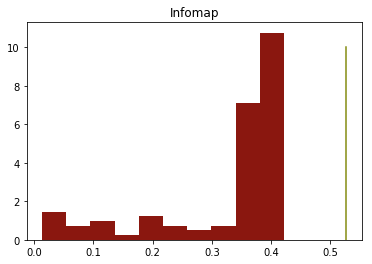

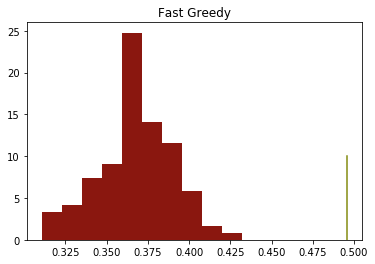

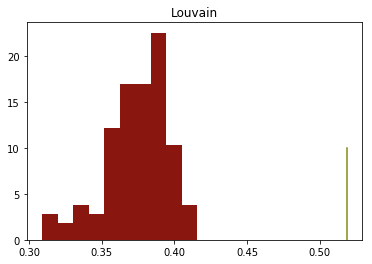

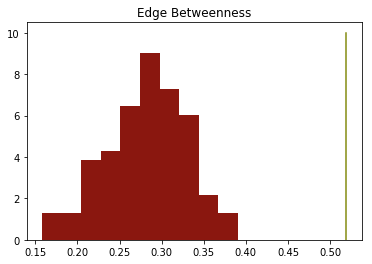

In [363]:
plt.hist(Modularidad_random[0,:],density=True)
plt.plot([Modularidad[0],Modularidad[0]],[0,10])
plt.title('Infomap')
plt.show()

plt.hist(Modularidad_random[1,:],density=True)
plt.plot([Modularidad[1],Modularidad[1]],[0,10])
plt.title('Fast Greedy')
plt.show()

plt.hist(Modularidad_random[2,:],density=True)
plt.plot([Modularidad[2],Modularidad[2]],[0,10])
plt.title('Louvain')
plt.show()

plt.hist(Modularidad_random[3,:],density=True)
plt.plot([Modularidad[3],Modularidad[3]],[0,10])
plt.title('Edge Betweenness')
plt.show()

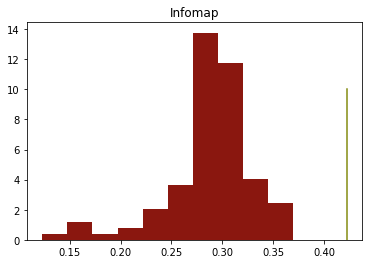

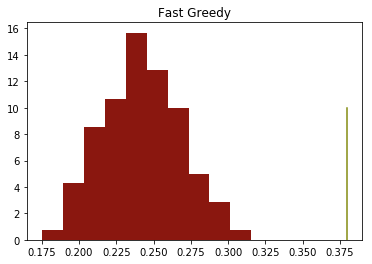

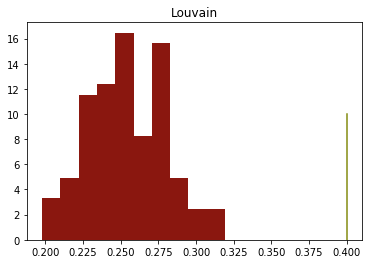

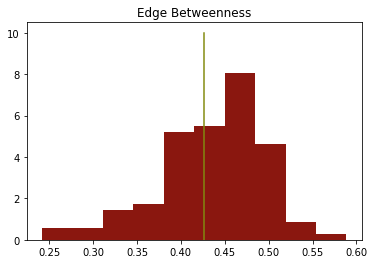

In [364]:
plt.hist(S_random[0,:],density=True)
plt.plot([S[0],S[0]],[0,10])
plt.title('Infomap')
plt.show()

plt.hist(S_random[1,:],density=True)
plt.plot([S[1],S[1]],[0,10])
plt.title('Fast Greedy')
plt.show()

plt.hist(S_random[2,:],density=True)
plt.plot([S[2],S[2]],[0,10])
plt.title('Louvain')
plt.show()

plt.hist(S_random[3,:],density=True)
plt.plot([S[3],S[3]],[0,10])
plt.title('Edge Betweenness')
plt.show()

# De los histogramas vemos que podemos considerar a la red modular

# c) Podemos calcular la información mutua

In [30]:
G_im,labels_infomap,attributes_im

np.find(labels_infomap)

AttributeError: module 'numpy' has no attribute 'find'

In [60]:
unique, p_im = np.unique(labels_infomap, return_counts=True)
p_im
len(p_im)

6

In [64]:
p1=[len(p_im)][len(p_im)]

IndexError: list index out of range

In [86]:
from __future__ import division

def informacion_mutua(L1,L2):
    # P1 - Primera partición comparada
    # P2 - Segunda partición comparada
    int_L1=[0]*len(L1)
    int_L2=[0]*len(L2)
    
    unique1, P1 = np.unique(L1, return_counts=True)
    unique2, P2 = np.unique(L2, return_counts=True)
    P12 = np.zeros(shape=(len(P1),len(P2)))
    p1p2 = np.zeros(shape=(len(P1),len(P2)))
    arg_log = np.zeros(shape=(len(P1),len(P2)))
    
    for i in range(len(L1)):
        int_L1[i]=int(L1[i])
        int_L2[i]=int(L2[i])
    for i in range(len(L1)):
        P12[int_L1[i]-1][int_L2[i]-1]=+1
    
    p12 = P12/np.sum(P12)
    p1 = P1/np.sum(P1)
    p2 = P2/np.sum(P2)
    
    for i  in range(len(P1)):
        for j in range(len(P2)):
            p1p2[i][j]=p1[i]*p2[j]
    
    for i  in range(len(P1)):
        for j in range(len(P2)):
            if p12[i][j] == 0:
                arg_log[i][j]=1   
            else:
                arg_log[i][j]=p12[i][j]/p1p2[i][j]
    
    Im= np.sum(p12*np.log10(arg_log))   
    H1 = -np.sum(p1*np.log10(p1))
    H2 = -np.sum(p2*np.log10(p2))
    n_Im = 2*Im/(H1+H2)
    return(Im)
    

In [39]:
from __future__ import division
4/5

0.8

In [34]:
 int_labels_infomap=[0]*len(labels_infomap)
for i in range(len(labels_infomap)):
    int_labels_infomap[i]=int(labels_infomap[i])
    

In [35]:
print(int_labels_infomap)

[5, 4, 5, 6, 3, 2, 2, 4, 6, 2, 5, 3, 1, 2, 1, 3, 1, 2, 3, 4, 1, 3, 2, 3, 3, 4, 4, 4, 4, 3, 4, 2, 2, 1, 1, 3, 6, 1, 1, 6, 1, 2, 5, 1, 1, 3, 1, 5, 2, 1, 1, 3, 1, 1, 2, 3, 2, 2, 1, 6, 2, 1]


In [37]:
print(labels_infomap)

[5. 4. 5. 6. 3. 2. 2. 4. 6. 2. 5. 3. 1. 2. 1. 3. 1. 2. 3. 4. 1. 3. 2. 3.
 3. 4. 4. 4. 4. 3. 4. 2. 2. 1. 1. 3. 6. 1. 1. 6. 1. 2. 5. 1. 1. 3. 1. 5.
 2. 1. 1. 3. 1. 1. 2. 3. 2. 2. 1. 6. 2. 1.]


In [48]:
afffa=np.array([[1, 3, 4], [4, 5,6]])

In [49]:
afffa

array([[1, 3, 4],
       [4, 5, 6]])

In [52]:
np.sum(afffa)

23

In [53]:
bfffb=np.array([[2, 1, 1], [3, 1,10]])

In [54]:
print(afffa*bfffb)

[[ 2  3  4]
 [12  5 60]]


In [56]:
np.log10(afffa)

array([[0.        , 0.47712125, 0.60205999],
       [0.60205999, 0.69897   , 0.77815125]])

In [57]:
print(afffa/bfffb)

[[0.5        3.         4.        ]
 [1.33333333 5.         0.6       ]]


In [87]:
Im_in_lo=informacion_mutua(labels_infomap,labels_louvain)
Im_in_fg=informacion_mutua(labels_infomap,labels_fastGreedy)
Im_in_eb=informacion_mutua(labels_infomap,labels_edgeBetweenness)
Im_fg_lo=informacion_mutua(labels_fastGreedy,labels_louvain)
Im_fg_eb=informacion_mutua(labels_fastGreedy,labels_edgeBetweenness)
Im_eb_lo=informacion_mutua(labels_edgeBetweenness,labels_louvain)

In [88]:
Info_map=[1, Im_in_fg, Im_in_lo, Im_in_eb]
Info_fg=[Im_in_fg, 1, Im_fg_lo, Im_fg_eb]
Info_lo=[Im_in_lo, Im_fg_lo, 1, Im_eb_lo]
Info_eb=[Im_in_eb, Im_fg_eb, Im_eb_lo, 1]

d2 = {'Infomap': Info_map, 'Fast Greedy': Info_fg,'Louvain':Info_lo,'Edge Betweenness':Info_eb}
Tabla_2=pd.DataFrame(data=d2)
Tabla_2.index=["Infomap","Fast Greedy","Louvain","Edge Betweenness"]
print(Tabla_2)

                   Infomap  Fast Greedy   Louvain  Edge Betweenness
Infomap           1.000000     0.662243  0.639444          0.599644
Fast Greedy       0.662243     1.000000  0.562236          0.481407
Louvain           0.639444     0.562236  1.000000          0.503390
Edge Betweenness  0.599644     0.481407  0.503390          1.000000


## Punto d: Relación género comunidad

In [89]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

a = ldata('D:\Para procesar\Académica\Ciencias Físicas\Doctorado\Materias\Redes complejas\Trabajos_prácticos\Redes_FLEM\TP_3\dolphinsGender.txt')

In [92]:
for dolph in a:
    G.nodes[dolph[0]]['Gender'] = dolph[1]

In [111]:
labels_generos = []
for dol in G.nodes():
    #print(G.nodes[dol]['Gender'])
    if G.nodes[dol]['Gender']=='m':
        gen=1
    elif G.nodes[dol]['Gender']=='f':
         gen=2
    else:
        gen=3
                
    labels_generos.append(gen)
    
print(labels_generos)
    


[1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 3, 1, 2, 2, 1, 2, 3, 1, 1]


In [112]:
Im_ge_in=informacion_mutua(labels_infomap,labels_generos)
Im_ge_fg=informacion_mutua(labels_generos,labels_fastGreedy)
Im_ge_eb=informacion_mutua(labels_generos,labels_edgeBetweenness)
Im_ge_lo=informacion_mutua(labels_generos,labels_louvain)


In [113]:
print(Im_ge_in)
print(Im_ge_fg)
print(Im_ge_eb)
print(Im_ge_lo)

0.20728888157204844
0.1984616774657579
0.23020330289163177
0.180601588991827


In [131]:
import random

def GeneroAzar(a):
    b = [2]*62
    cu=[]
    cu1 = np.zeros(shape=(1,3))
    indices_m = random.sample(range(62), 34)
    for num in indices_m:
        b[num] = 1
    for i in range(62):
        if (i in indices_m) ==0:
            cu.append(i)
        
    cu1=np.random.choice(cu, size=3, replace=False, p=None)
    for num in cu1:
        b[num] = 3
    return b

In [114]:
def test_representacion(L1,L2,nSamples):
    # Asignar nodos al azar
    dist = [0]*nSamples
    for i in range(nSamples):
        az_L1 = GeneroAzar(L1)
        dist[i]=informacion_mutua(az_L1,L2)
    return dist
        

In [117]:
print([2]*62)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


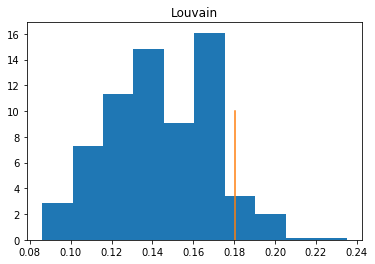

In [142]:
Dist_louvain=test_representacion(labels_generos,labels_louvain,10000)
plt.hist(Dist_louvain,density=True)
plt.plot([Im_ge_lo,Im_ge_lo],[0,10])
plt.title('Louvain')
plt.show()

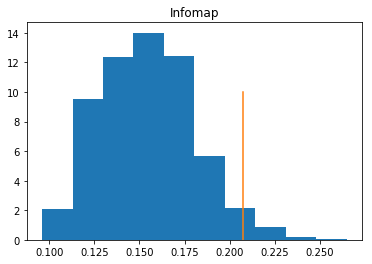

In [140]:
Dist_infomap=test_representacion(labels_generos,labels_infomap,10000)
plt.hist(Dist_infomap,density=True)
plt.plot([Im_ge_in,Im_ge_in],[0,10])
plt.title('Infomap')
plt.show()

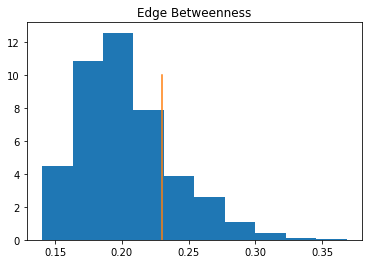

In [143]:
Dist_edgeBet=test_representacion(labels_generos,labels_edgeBetweenness,10000)
plt.hist(Dist_edgeBet,density=True)
plt.plot([Im_ge_eb,Im_ge_eb],[0,10])
plt.title('Edge Betweenness')
plt.show()

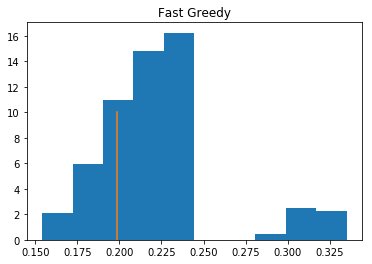

In [144]:
Dist_fg=test_representacion(labels_generos,labels_fastGreedy,10000)
plt.hist(Dist_fg,density=True)
plt.plot([Im_ge_fg,Im_ge_fg],[0,10])
plt.title('Fast Greedy')
plt.show()